## Script para plotagem dos dados gravimétricos terrestres referentes a Bacia de Barreirinhas (dados adquiridos por Nelson Delimar - Nielsen)

In [1]:
# importando as bibliotecas necessarias para o uso do script:
# import necessary library:
import numpy as np
import pylab as py
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from scipy.interpolate import Rbf # radial basis functions technique
# to plot figures in cells:
%matplotlib inline

In [2]:
# importacao das funções externas ao anaconda:
from modules.auxiliars import inv_power_dist
from modules.maps import plota_mapa

In [3]:
# leitura dos dados via pandas e via numpy:
# 1) dados do nielsen:
#data = pd.read_table('../../dados_reais/Barreirinhas/data_barreirinhas.txt')
#print data

# for Mathews PC:
data = pd.read_table('../dados_reais/data_barreirinhas.txt')


# 2) dados de satelite (potzdam): 
#lon_sat, lat_sat, gz_sat = np.loadtxt('../../dados_reais/Barreirinhas/barreirinhas_satelite.gdf', skiprows = 35, usecols = (0,1,3), unpack = True) 

# For Mathews PC:
lon_sat, lat_sat, gz_sat = np.loadtxt('../dados_reais/barreirinhas_satelite.gdf', skiprows = 35, usecols = (0,1,3), unpack = True) 

# variaveis para usar a funcao plota mapa:
lon_sat = lon_sat -360.0  # correcao de quadrante 

Text(0.5,1,u'Dados Barreirinhas completo')

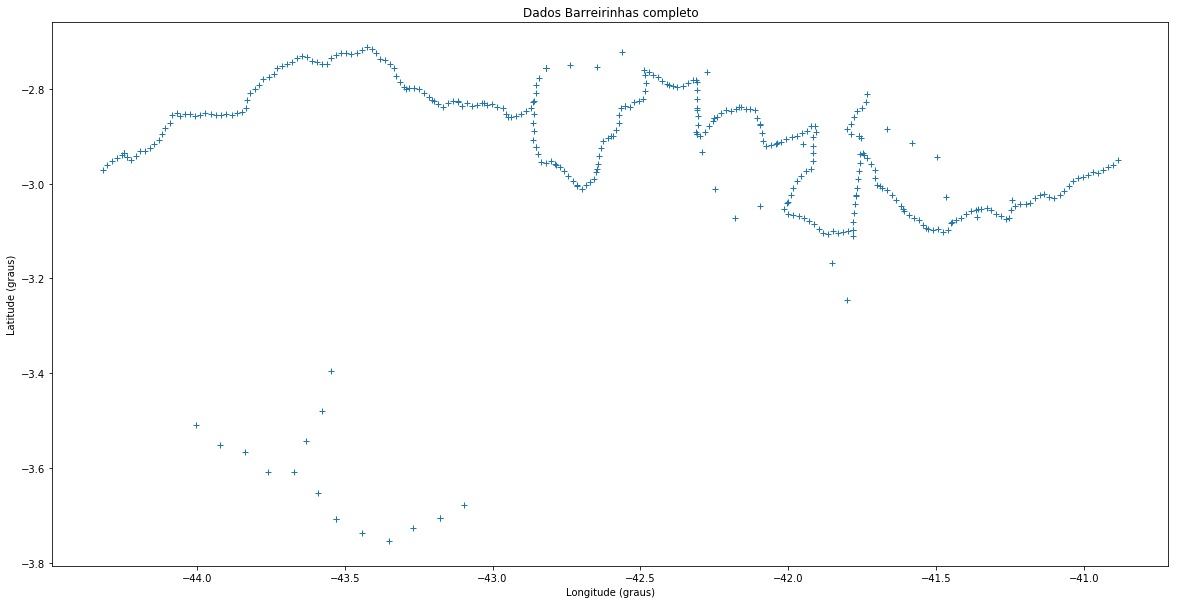

In [4]:
# leitura dos dados via pandas:
#print sat
# visualizacao da figura na tela:
py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura
plt.plot(data.iloc[:,1], data.iloc[:,2], '+')
plt.xlabel('Longitude (graus)')
plt.ylabel('Latitude (graus)')
plt.title('Dados Barreirinhas completo')

In [5]:
# Remoçaõ de outliers dos dados: Etapa 01: seleção do range indesejavel:
df = data.loc[(data['Longitude'] < -43.0)]        
df = df.loc[(df['Latitude'] < -3.2)]
#print df
# remover as linhas armazenadas no array indices:
df = data.drop(df.index.values)
# por em ordem em função da longitude(coluna 2)
ds = df.sort_values(by=['Longitude'], ascending=True)
# remove valores repetidos em diferentes linhas:
ds.drop_duplicates(['Longitude'], keep='first', inplace=True )
#print ds.duplicated()
#print data_sort.iloc[:,1]
#print data_sort.iloc[0,1]
# associando os dados as variaveis mnemonicas:
lon = np.array(ds.iloc[:,1])
lat = np.array(ds.iloc[:,2])
utmx = np.array(ds.iloc[:,3])
utmy = np.array(ds.iloc[:,4])
elev = np.array(ds.iloc[:,5]) 
gz = np.array(ds.iloc[:,8])

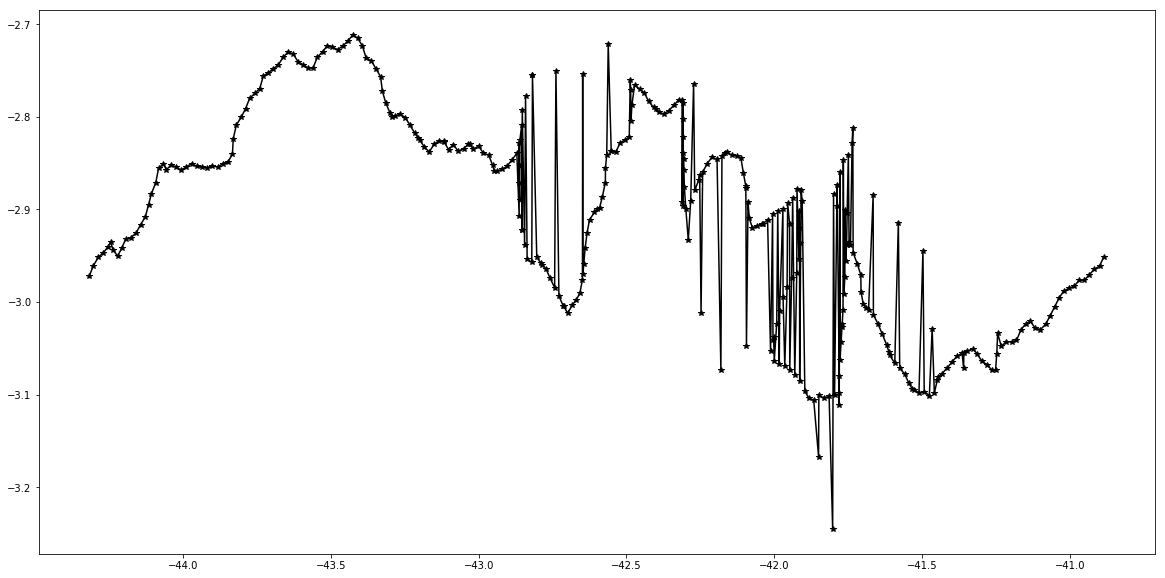

In [6]:
# plot dos dados de barreirinhas:
py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura
plt.plot(lon,lat,'*-k')

In [7]:
#ajustando o perfil a partir dos dados terrestres:
# etapa: leitura das coordenadas:
x = lon
y = lat
# Construção da matriz A (chamada de matriz de sensiblidade)
A = np.zeros( (np.size(x),2) )
#print np.shape(A)
A[:,0] = x
A[:,1] = 1.0

### Equação de minimos quadrados para ajustar o perfil que passa mais proximo aos pontos medidos:
### $$\mathbf{p} = (A^TA)^{-1}A^Ty$$

In [8]:
# minimos quadrados:
# Transposto:
AT = np.transpose(A)
# Multiplicação de MAtrizes: 
ATA = np.matmul(AT,A)
# Calculo da inversa de ATA:
iATA = np.linalg.inv(ATA)
# multiplicando por AT:
iATA_AT = np.matmul(iATA,AT)
# multiplicando por y:
p = np.matmul(iATA_AT,y)
print p
# gerando valores de lat do perfil: y=ax+b:
yr = p[0]*x + p[1] # sao os valores de latitude para o perfil.

[-0.07620278 -6.14669756]


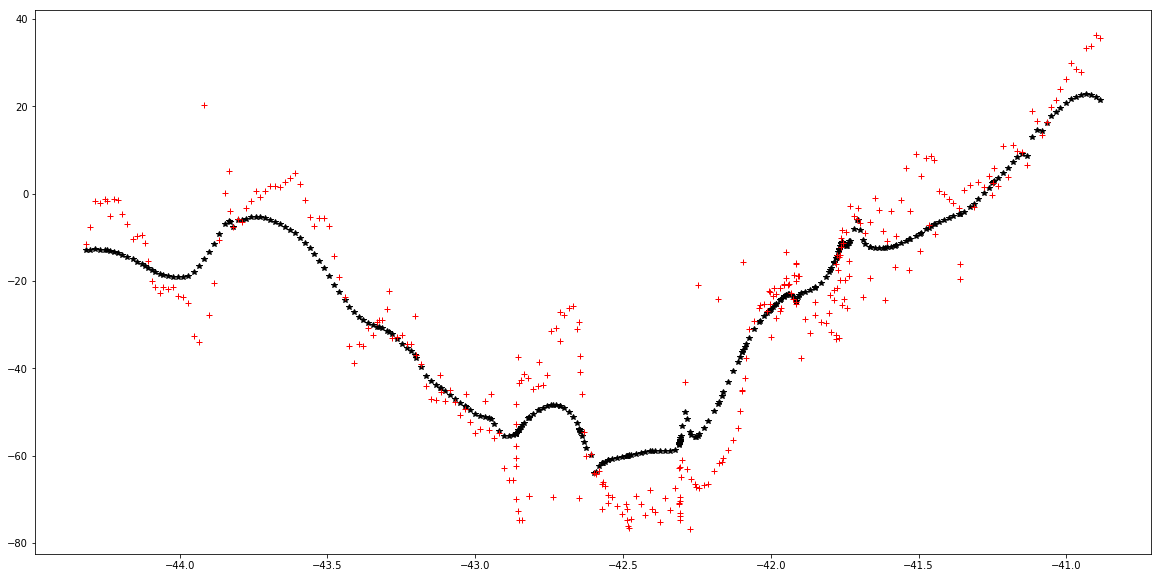

In [9]:
# interpolação pelo inverso da potencia da distancia para computar a anomalia da gravidade no perfil ajustado:
gzi = inv_power_dist(lon,lat,gz,x,yr,2.0)
plt.plot(x,gzi,'*k')
plt.plot(x,gz,'+r')
#plt.plot(lon,gz,'ro')

In [10]:
### Interpolaçao para calcular a anomalia da gravidade nos pontos do perfil:
#interpolator = Rbf(utmx,utmy,gz,function='Gaussian')
# interpolacao dos gzs para os pontos do perfil:
#gzi = interpolator(utmx,yr)
# verificacao:
#print gz.shape, gzi.shape

In [11]:
# plot dos dados:
def drawstates(ax, shapefile='../../dados_reais/brazil_shapefile/BRA_adm0.shp'):
        shp = m.readshapefile(shapefile, 'states', drawbounds=True)
        for nshape, seg in enumerate(m.states):
            poly = Polygon(seg, facecolor='0.75', edgecolor='k')
            ax.add_patch(poly)


### Coordenadas x y da projeção cartográfica

In [12]:
# para o mundo todo:
#m = Basemap(projection='robin',lon_0=0,resolution='c')
#x, y = m(long, lat)

In [13]:
# calculo da area onde serao plotadas as imagens:
long_min = np.min(lon_sat)
long_max = np.max(lon_sat)
lat_min = np.min(lat_sat)
lat_max = np.max(lat_sat)

long_central = 0.5*(long_max + long_min)
lat_central = 0.5*(lat_max + lat_min)
area = [long_min, long_max,
        lat_min, lat_max]
print (area)

#area = [-45.0, -40.0, -4.0, -2.6]
long0 = 0.5*(area[0] + area[1])
lat0 = 0.5*(area[2] + area[3])
#print(long0,lat0)

[-45.0, -40.0, -3.8, -2.6]


C:\Users\Mateus\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\Mateus\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


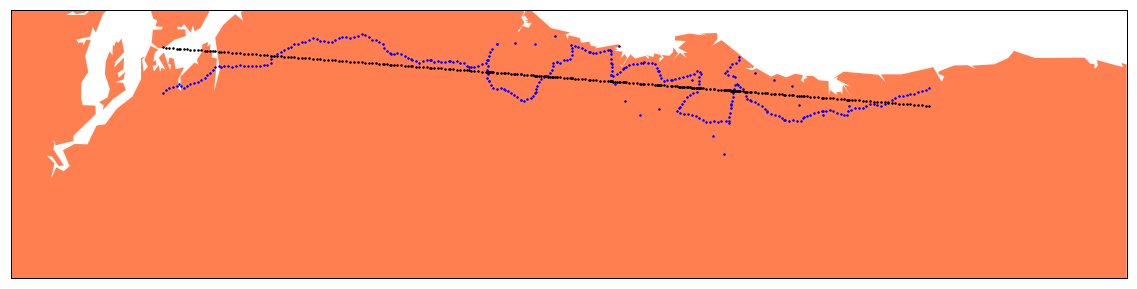

In [14]:
# para uma regiao delimitada:
m = Basemap(llcrnrlon=area[0],llcrnrlat=area[2],
            urcrnrlon=area[1],urcrnrlat=area[3],
            resolution='i',projection='poly',
            lon_0=long0,lat_0=lat0)
m.drawcountries()
m.fillcontinents(color = 'coral')
m.drawmapboundary()
# plot dos dados sobrepostos ao mapa da região:
# posicao geográfica dos dados reais:
xd,yd = m(lon, lat)
# posição geográfica dos dados no perfil:
xi,yi = m(lon, yr)
# plot do ambos no mapa:
m.plot(xd, yd, 'b.', markersize=3)
m.plot(xi,yi,'k.', markersize=3)
plt.show() 

In [15]:
print ('x min.  = %12.5f km' % (np.min(utmx)*0.001) )
print ('x medio = %12.5f km' % (np.mean(utmx)*0.001) )
print ('x max.  = %12.5f km' % (np.max(utmx)*0.001) )
print ('x var.  = %12.5f km' % ((np.max(utmx) - np.min(utmx))*0.001) )
print ('y min.  = %12.5f km' % (np.min(utmy)*0.001) )
print ('y medio = %12.5f km' % (np.mean(utmy)*0.001) )
print ('y max.  = %12.5f km' % (np.max(utmy)*0.001) )
print ('y var.  = %12.5f km' % ((np.max(utmy) - np.min(utmy))*0.001) )

x min.  =    132.16000 km
x medio =    527.10303 km
x max.  =    833.04200 km
x var.  =    700.88200 km
y min.  =   9640.87100 km
y medio =   9678.03174 km
y max.  =   9700.16300 km
y var.  =     59.29200 km


2


C:\Users\Mateus\Anaconda2\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'tri'
  s)


RuntimeError: Can not put single artist in more than one figure

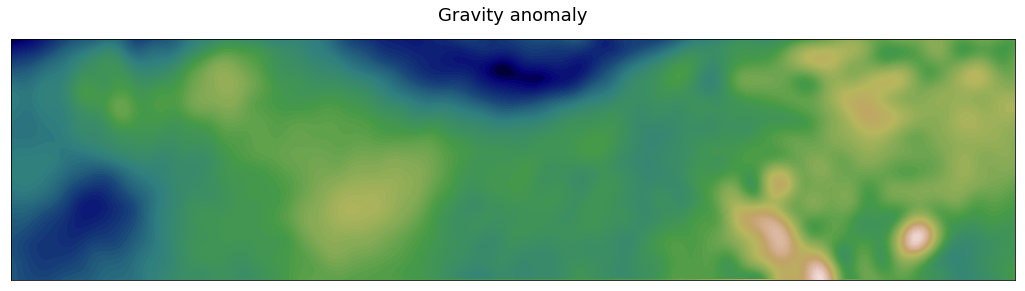

In [16]:
# plot do mapa 
# extermos do ṕerfil:

xx,yy = m(lon_sat,lat_sat)

# criação da matrix com o perfil ajustado:
npr = np.size(lon) # dimensao do array com os pontos do perfil criado
lon_perfil = [ lon[0], lon[npr-1] ]
lat_perfil = [ yr[0], yr[npr-1] ]
#print lat_perfil
# transformação em array:
lon_perfil = np.array(lon_perfil)
lat_perfil = np.array(lat_perfil)
# CONVERSAO para utm:
p1, p2 = m(lon_perfil, lat_perfil)
perfil = np.transpose([p1,p2])
#print range(0,perfil.shape[0],2)      
print perfil.shape[0]              
plota_mapa(m, xx, yy, gz_sat, area, 'mGal', 'Gravity anomaly', 'gist_earth', 
              (18, 12), 30., perfil, estados=None, escala=True, eixos=True)

In [17]:
#### conversao das coordenadas para utm através da funcao basemap:
xd,yd = m(x, yr)
# convertendo para array:
xd = np.array(xd)
yd = np.array(yd)
# converter para kilometro (para utilizar no programa dir_basin_2D - Rao et.all., 1994):
xd = xd/1000.0
yd = yd/1000.0
elev = elev/1000. # conversao da elevacao de metros para kilometros:

In [18]:
# escrevendo o arquivo com os dados do perfil:
np.savetxt('../dados_reais/barreirinhas_perfil.txt', np.transpose( (xd, yd, elev, gzi) ), fmt = '%10.7f', delimiter = '   ',  header = 'x(km)      y(km)        elev(km)      g_anom(mGal)')

# For Mathews PC:
#np.savetxt('../dados_reais/barreirinhas_perfil.txt', np.transpose( (xd, yd, elev, gzi) ), fmt = '%10.7f', delimiter = '   ',  header = 'x(km)      y(km)        elev(km)      g_anom(mGal)')
